#데이터 불러오기

In [1]:
import json
import os
import pandas as pd

# JSON 데이터를 읽어오는 함수
def read_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data

# 여러 개의 JSON 데이터를 하나의 DataFrame으로 변환하는 함수
def json_to_dataframe(json_data_list):
    rows = []
    for json_data in json_data_list:
        for flight in json_data:
            departure_city = flight['departure_city']
            arrival_city = flight['arrival_city']
            date = flight['date']

            for time, details in flight['tickets'].items():
                row = {
                    "departure_city": departure_city,
                    "arrival_city": arrival_city,
                    "date": date,
                    "departure_time": details['departure_time'],
                    "airline": details['airline'],
                    "arrival_time": details['arrival_time'],
                    "min_fare": details['min_fare'],
                    "adult_fare": details['fare_details']['adult_fare'],
                    "child_fare": details['fare_details']['child_fare'],
                    "adult_fuel_surcharge": details['fare_details']['adult_fuel_surcharge'],
                    "child_fuel_surcharge": details['fare_details']['child_fuel_surcharge'],
                    "adult_tax": details['fare_details']['adult_tax'],
                    "child_tax": details['fare_details']['child_tax'],
                    "adult_discount_fare": details['fare_details']['adult_discount_fare'],
                    "child_discount_fare": details['fare_details']['child_discount_fare']
                }
                rows.append(row)
    return pd.DataFrame(rows)

# 디렉토리에서 모든 JSON 파일 경로를 가져오는 함수
def get_json_files(directory):
    json_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.json')]
    return json_files

# 디렉토리 경로 설정 (모든 JSON 파일이 들어 있는 디렉토리)
directory_path = '/content/drive/MyDrive/2024 YBIGTA 여행루트추천(컨퍼)/항공권 데이터'

# 디렉토리 내 모든 JSON 파일 가져오기
json_file_paths = get_json_files(directory_path)

# JSON 파일을 순차적으로 읽어들여 데이터를 리스트에 저장
json_data_list = [read_json(file_path) for file_path in json_file_paths]

# JSON 데이터를 DataFrame으로 변환
from_seoul = json_to_dataframe(json_data_list)

# 날짜 데이터를 처리하는 기존 코드 적용
from_seoul['date'] = pd.to_datetime(from_seoul['date'], format='%Y%m%d')
from_seoul['year'] = from_seoul['date'].dt.year
from_seoul['month'] = from_seoul['date'].dt.month
from_seoul['day'] = from_seoul['date'].dt.day

# departure_time과 arrival_time을 datetime 형식으로 변환
from_seoul['departure_time2'] = pd.to_datetime(from_seoul['departure_time'], format='%H:%M')
from_seoul['arrival_time2'] = pd.to_datetime(from_seoul['arrival_time'], format='%H:%M')

# 날짜를 넘겨 도착하는 경우 (arrival_time < departure_time) 24시간을 더해줌
from_seoul['arrival_time2'] = from_seoul.apply(
    lambda row: row['arrival_time2'] + pd.Timedelta(days=1) if row['arrival_time2'] < row['departure_time2'] else row['arrival_time2'],
    axis=1
)

# 비행시간 계산
from_seoul['flight_duration'] = (from_seoul['arrival_time2'] - from_seoul['departure_time2']).dt.total_seconds() / 60

# '06:05'에서 '06'만 추출하고 정수형으로 변환하는 코드
from_seoul['dep_hour'] = from_seoul['departure_time'].str[:2].astype(int)
from_seoul['arr_hour'] = from_seoul['arrival_time'].str[:2].astype(int)

# 결과 데이터프레임을 CSV 파일로 저장
from_seoul.to_csv('combined_output.csv', index=False)

# 데이터프레임 출력
from_seoul.head(10)


departure_city arrival_city       date departure_time airline arrival_time  \
0             광주           제주 2024-08-18          08:55   티웨이항공        09:50   
1             광주           제주 2024-08-18          09:55  아시아나항공        10:45   
2             광주           제주 2024-08-18          10:10    제주항공        11:00   
3             광주           제주 2024-08-18          10:40    대한항공        11:35   
4             광주           제주 2024-08-18          12:05   티웨이항공        12:55   
5             광주           제주 2024-08-18          12:50  아시아나항공        13:50   
6             광주           제주 2024-08-18          13:10    대한항공        14:05   
7             광주           제주 2024-08-18          14:40  아시아나항공        15:30   
8             광주           제주 2024-08-18          14:45    대한항공        15:40   
9             광주           제주 2024-08-18          15:05   티웨이항공        16:00   

   min_fare  adult_fare  child_fare  adult_fuel_surcharge  ...  \
0     85900       71000           0                  9900  ...   
1     74000       58000           0                 11000  ...   
2     89000       74600           0                     0  ...   
3     95000      117200           0                     0  ...   
4     85900       71000           0                  9900  ...   
5     98000       82000           0                 11000  ...   
6     64000       48000       48000                 11000  ...   
7     98000       82000           0                 11000  ...   
8     64000       48000       48000                 11000  ...   
9     85900       71000           0                  9900  ...   

   adult_discount_fare  child_discount_fare  year month day  \
0                 None                 None  2024     8  18   
1                 None                 None  2024     8  18   
2                 None                 None  2024     8  18   
3                 None                 None  2024     8  18   
4                 None                 None  2024     8  18   
5                 None                 None  2024     8  18   
6                 None                 None  2024     8  18   
7                 None                 None  2024     8  18   
8                 None                 None  2024     8  18   
9                 None                 None  2024     8  18   

      departure_time2       arrival_time2  flight_duration dep_hour arr_hour  
0 1900-01-01 08:55:00 1900-01-01 09:50:00             55.0        8        9  
1 1900-01-01 09:55:00 1900-01-01 10:45:00             50.0        9       10  
2 1900-01-01 10:10:00 1900-01-01 11:00:00             50.0       10       11  
3 1900-01-01 10:40:00 1900-01-01 11:35:00             55.0       10       11  
4 1900-01-01 12:05:00 1900-01-01 12:55:00             50.0       12       12  
5 1900-01-01 12:50:00 1900-01-01 13:50:00             60.0       12       13  
6 1900-01-01 13:10:00 1900-01-01 14:05:00             55.0       13       14  
7 1900-01-01 14:40:00 1900-01-01 15:30:00             50.0       14       15  
8 1900-01-01 14:45:00 1900-01-01 15:40:00             55.0       14       15  
9 1900-01-01 15:05:00 1900-01-01 16:00:00             55.0       15       16  

[10 rows x 23 columns]

#비행기 가격 EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

matplotlib 한글 폰트 깨짐 현상 해결 코드

In [3]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [4]:
from_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90139 entries, 0 to 90138
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   departure_city        90139 non-null  object        
 1   arrival_city          90139 non-null  object        
 2   date                  90139 non-null  datetime64[ns]
 3   departure_time        90139 non-null  object        
 4   airline               90139 non-null  object        
 5   arrival_time          90139 non-null  object        
 6   min_fare              90139 non-null  int64         
 7   adult_fare            90139 non-null  int64         
 8   child_fare            90139 non-null  int64         
 9   adult_fuel_surcharge  90139 non-null  int64         
 10  child_fuel_surcharge  90139 non-null  int64         
 11  adult_tax             90139 non-null  int64         
 12  child_tax             90139 non-null  int64         
 13  adult_discount_f

##날짜별 평균 요금 분석

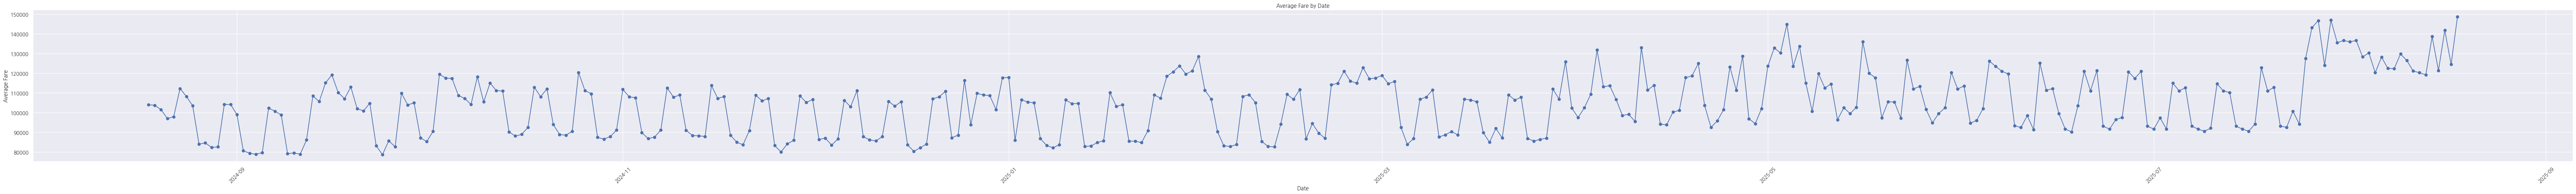

In [5]:
# 날짜별 평균 요금 계산
daily_avg_fare = from_seoul.groupby('date')['min_fare'].mean().reset_index()

# 시각화
plt.figure(figsize=(100, 6))
plt.plot(daily_avg_fare['date'], daily_avg_fare['min_fare'], marker='o')
plt.title('Average Fare by Date')
plt.xlabel('Date')
plt.ylabel('Average Fare')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##날짜별 최소, 최대, 평균 요금 분석

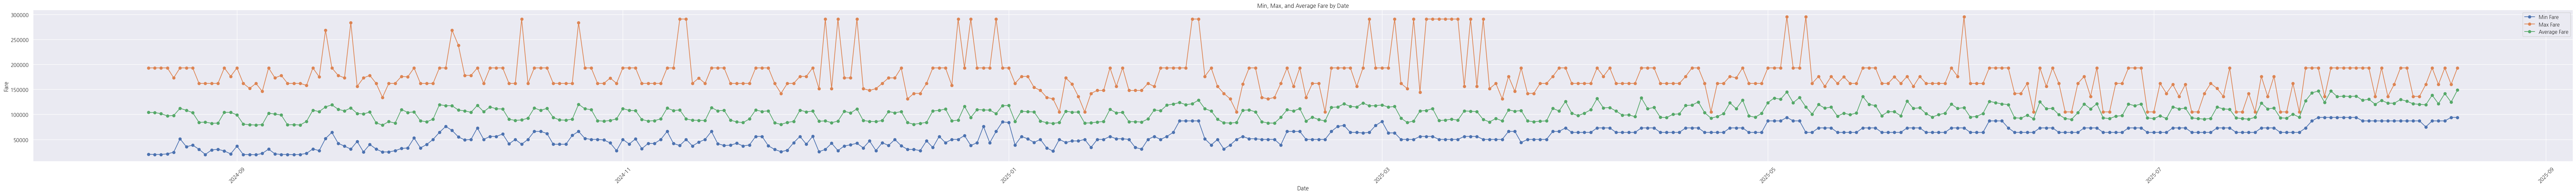

In [6]:
# 날짜별 최소, 최대, 평균 요금 계산
daily_fare_stats = from_seoul.groupby('date')['min_fare'].agg(['min', 'max', 'mean']).reset_index()

# 시각화
plt.figure(figsize=(100, 6))
plt.plot(daily_fare_stats['date'], daily_fare_stats['min'], label='Min Fare', marker='o')
plt.plot(daily_fare_stats['date'], daily_fare_stats['max'], label='Max Fare', marker='o')
plt.plot(daily_fare_stats['date'], daily_fare_stats['mean'], label='Average Fare', marker='o')
plt.title('Min, Max, and Average Fare by Date')
plt.xlabel('Date')
plt.ylabel('Fare')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##월별 요금 추세 분석

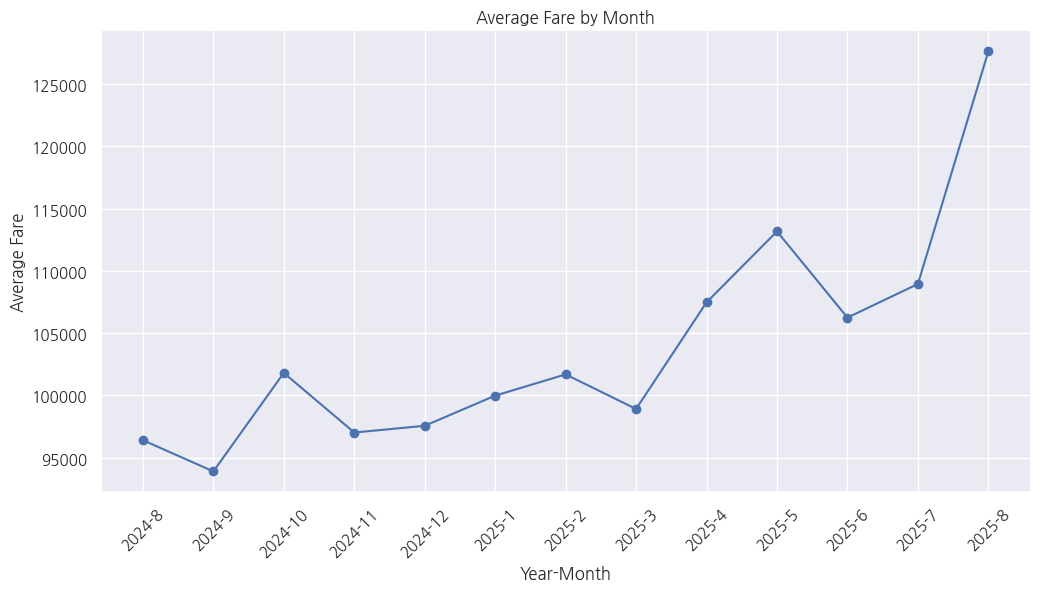

In [7]:
# 월별 평균 요금 계산
monthly_avg_fare = from_seoul.groupby(['year', 'month'])['min_fare'].mean().reset_index()

# 시각화를 위해 year-month 형식으로 변환
monthly_avg_fare['year_month'] = monthly_avg_fare['year'].astype(str) + '-' + monthly_avg_fare['month'].astype(str)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_fare['year_month'], monthly_avg_fare['min_fare'], marker='o')
plt.title('Average Fare by Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Fare')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##요일별 요금 분석

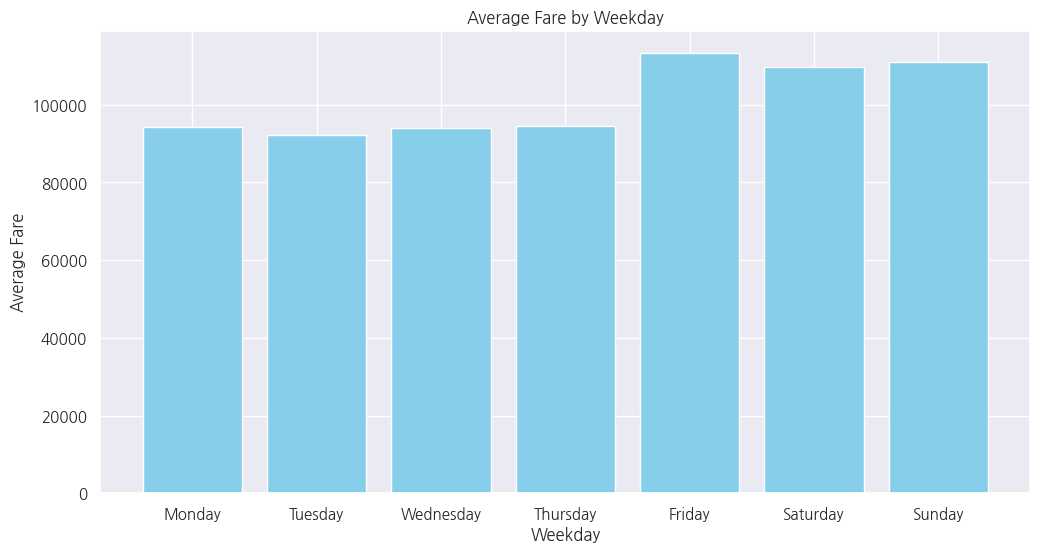

In [8]:
# 요일 추출
from_seoul['weekday'] = from_seoul['date'].dt.day_name()

# 요일별 평균 요금 계산
weekday_avg_fare = from_seoul.groupby('weekday')['min_fare'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(weekday_avg_fare['weekday'], weekday_avg_fare['min_fare'], color='skyblue')
plt.title('Average Fare by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Fare')
plt.grid(True)
plt.show()


##항공사별 요금 분석

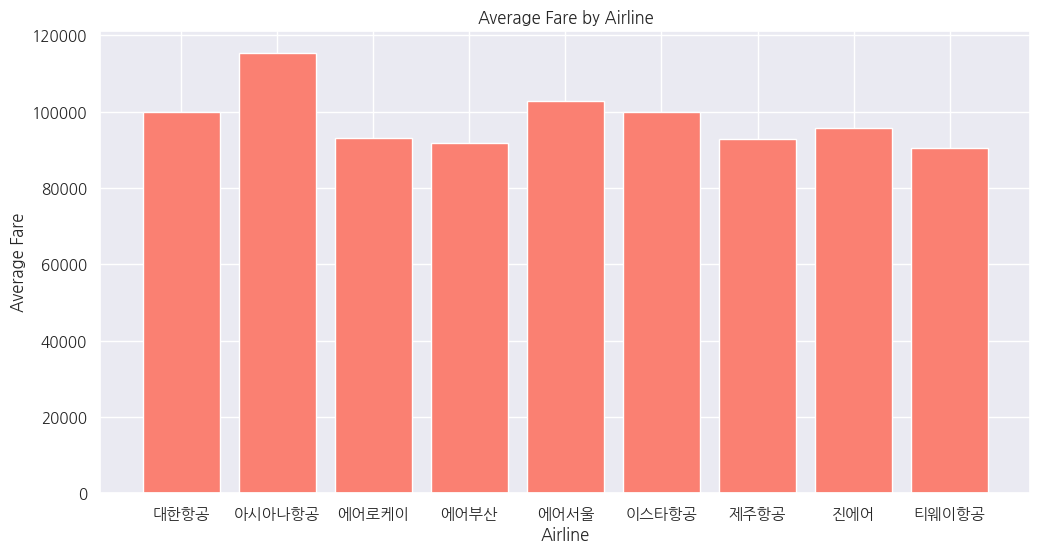

In [9]:
# 항공사별 평균 요금 계산
airline_avg_fare = from_seoul.groupby('airline')['min_fare'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(airline_avg_fare['airline'], airline_avg_fare['min_fare'], color='salmon')
plt.title('Average Fare by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Fare')
plt.grid(True)
plt.show()


##날짜별 항공사별 요금 트렌드 분석

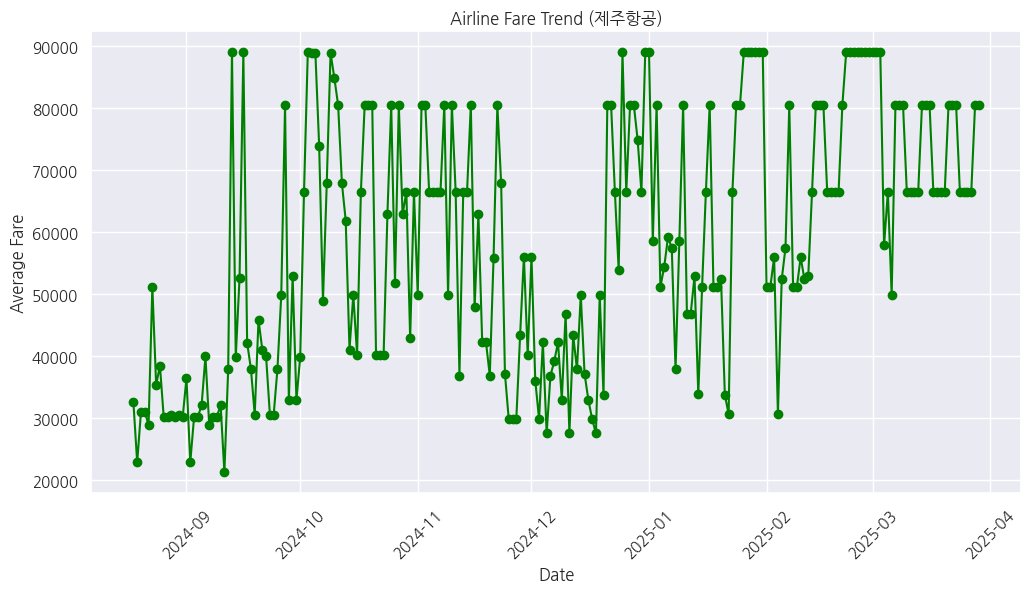

In [10]:
# 특정 항공사 선택 (예: 제주항공)
airline_fare_trend = from_seoul[from_seoul['airline'] == '제주항공'].groupby('date')['min_fare'].min().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(airline_fare_trend['date'], airline_fare_trend['min_fare'], marker='o', color='green')
plt.title('Airline Fare Trend (제주항공)')
plt.xlabel('Date')
plt.ylabel('Average Fare')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##비행시간과 요금의 관계 분석

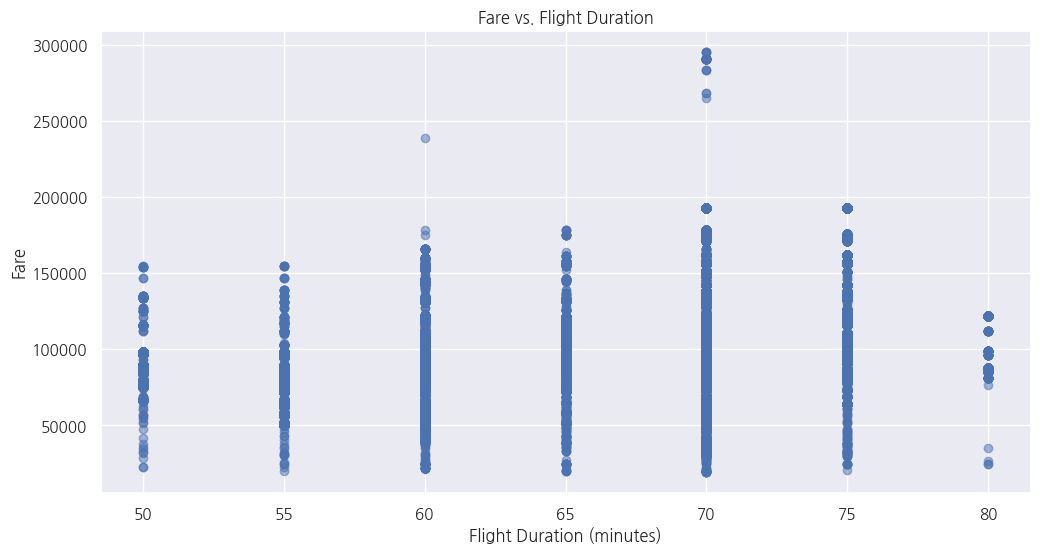

In [11]:
# 비행시간과 요금의 관계를 시각화
plt.figure(figsize=(12, 6))
plt.scatter(from_seoul['flight_duration'], from_seoul['min_fare'], alpha=0.5)
plt.title('Fare vs. Flight Duration')
plt.xlabel('Flight Duration (minutes)')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

<ipython-input-12-65be8571dd62>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_avg_fare = from_seoul.groupby('flight_duration_category')['min_fare'].mean().reset_index()


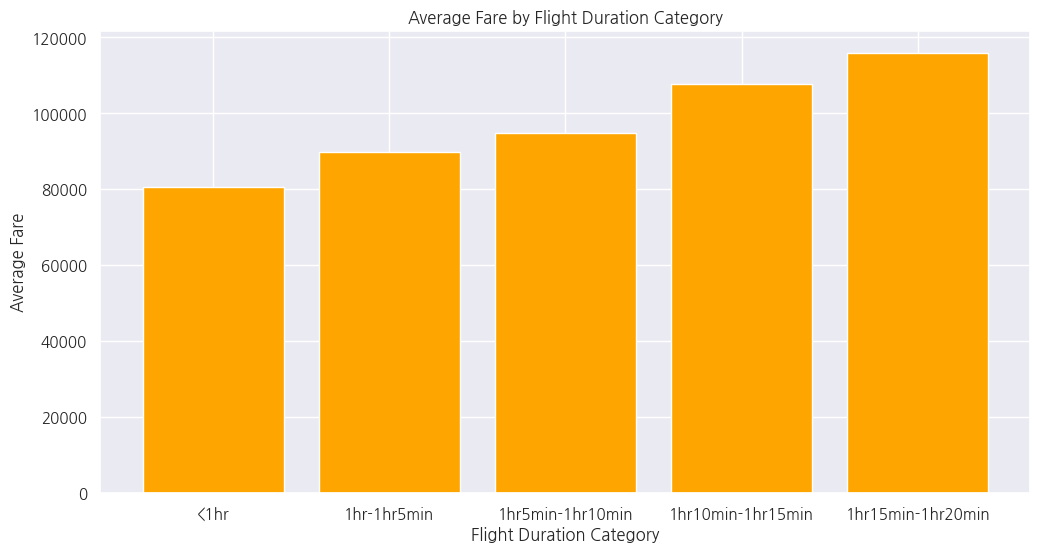

In [12]:
# 비행시간을 구간으로 나누기
bins = [0, 60, 65, 70, 75, 80]
labels = ['<1hr', '1hr-1hr5min', '1hr5min-1hr10min', '1hr10min-1hr15min', '1hr15min-1hr20min']
from_seoul['flight_duration_category'] = pd.cut(from_seoul['flight_duration'], bins=bins, labels=labels, right=False)

# 비행시간 구간별 평균 요금 계산
duration_avg_fare = from_seoul.groupby('flight_duration_category')['min_fare'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(duration_avg_fare['flight_duration_category'], duration_avg_fare['min_fare'], color='orange')
plt.title('Average Fare by Flight Duration Category')
plt.xlabel('Flight Duration Category')
plt.ylabel('Average Fare')
plt.grid(True)
plt.show()


##비행시간과 항공사 간의 관계 분석

<ipython-input-13-cf4f6d89c5bb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_airline_avg_fare = from_seoul.groupby(['flight_duration_category', 'airline'])['min_fare'].mean().unstack().reset_index()


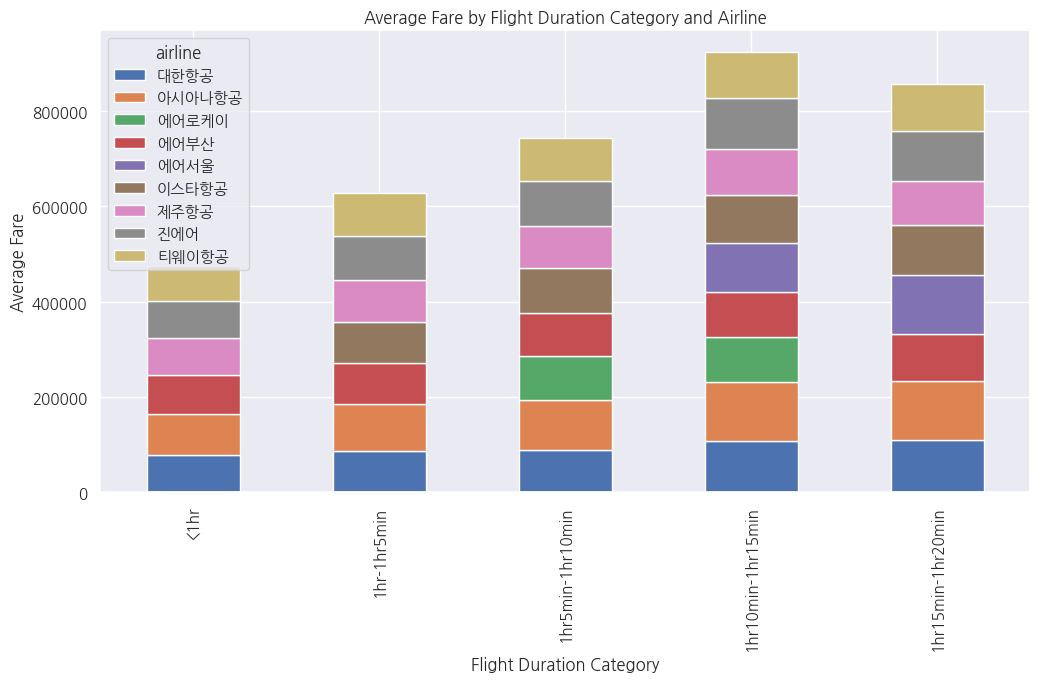

In [13]:
# 비행시간과 항공사에 따른 평균 요금 계산
duration_airline_avg_fare = from_seoul.groupby(['flight_duration_category', 'airline'])['min_fare'].mean().unstack().reset_index()

# 시각화
duration_airline_avg_fare.plot(kind='bar', x='flight_duration_category', stacked=True, figsize=(12, 6))
plt.title('Average Fare by Flight Duration Category and Airline')
plt.xlabel('Flight Duration Category')
plt.ylabel('Average Fare')
plt.grid(True)
plt.show()


#baseline modeling

In [14]:
from_seoul['route'] = from_seoul['departure_city'] + '->' + from_seoul['arrival_city']

In [15]:
train_sample = from_seoul[['route','year','month', 'day','weekday', 'dep_hour', 'arr_hour', 'flight_duration', 'airline', 'min_fare']]
train_sample_copy = from_seoul[['route', 'year','month', 'day','weekday', 'dep_hour', 'arr_hour', 'flight_duration', 'airline', 'min_fare']]

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


In [17]:
train_sample

route  year  month  day   weekday  dep_hour  arr_hour  \
0      광주->제주  2024      8   18    Sunday         8         9   
1      광주->제주  2024      8   18    Sunday         9        10   
2      광주->제주  2024      8   18    Sunday        10        11   
3      광주->제주  2024      8   18    Sunday        10        11   
4      광주->제주  2024      8   18    Sunday        12        12   
...       ...   ...    ...  ...       ...       ...       ...   
90134  제주->포항  2025      3   27  Thursday        18        19   
90135  제주->포항  2025      3   28    Friday        12        13   
90136  제주->포항  2025      3   28    Friday        18        19   
90137  제주->포항  2025      3   29  Saturday        12        13   
90138  제주->포항  2025      3   29  Saturday        18        19   

       flight_duration airline  min_fare  
0                 55.0   티웨이항공     85900  
1                 50.0  아시아나항공     74000  
2                 50.0    제주항공     89000  
3                 55.0    대한항공     95000  
4                 50.0   티웨이항공     85900  
...                ...     ...       ...  
90134             65.0     진에어     82000  
90135             65.0     진에어     94000  
90136             65.0     진에어     94000  
90137             65.0     진에어     94000  
90138             65.0     진에어     94000  

[90139 rows x 10 columns]

In [18]:
# 범주형 변수 식별 (필요에 따라 수동으로 지정 가능)
categorical_features = train_sample.select_dtypes(include=['object']).columns


from sklearn.preprocessing import OneHotEncoder

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(train_sample[categorical_features]))


# 인코딩된 컬럼 이름 설정
encoded_features.columns = encoder.get_feature_names_out(categorical_features)

# 기존 데이터프레임에서 범주형 변수 제거 후, 인코딩된 변수 추가
train_sample = train_sample.drop(categorical_features, axis=1)
train_sample = pd.concat([train_sample, encoded_features], axis=1)

# 인코딩 결과 확인
print(train_sample.head())


   year  month  day  dep_hour  arr_hour  flight_duration  min_fare  \
0  2024      8   18         8         9             55.0     85900   
1  2024      8   18         9        10             50.0     74000   
2  2024      8   18        10        11             50.0     89000   
3  2024      8   18        10        11             55.0     95000   
4  2024      8   18        12        12             50.0     85900   

   route_군산->제주  route_김포->제주  route_대구->제주  ...  weekday_Tuesday  \
0           0.0           0.0           0.0  ...              0.0   
1           0.0           0.0           0.0  ...              0.0   
2           0.0           0.0           0.0  ...              0.0   
3           0.0           0.0           0.0  ...              0.0   
4           0.0           0.0           0.0  ...              0.0   

   weekday_Wednesday  airline_아시아나항공  airline_에어로케이  airline_에어부산  \
0                0.0             0.0            0.0           0.0   
1                0.0      

In [19]:
# 특성 (X)과 타겟 변수 (y) 분리
X = train_sample.drop('min_fare', axis=1)
y = train_sample['min_fare']

In [20]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# 랜덤포레스트 회귀 모델 초기화 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [22]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 194620765.4286893
R^2 Score: 0.7257224815528163


In [23]:
# 예측 결과 시각화
plt.figure(figsize=(200, 6))

# 실제 값
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')

# 예측 값
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted', color='red', marker='x')

plt.title('Actual vs Predicted Min Fare')
plt.xlabel('Sample Index')
plt.ylabel('Min Fare')
plt.legend()

plt.show()

Output hidden; open in https://colab.research.google.com to view.

###시간대별로 최저가로 묶기

In [24]:
# dep_hour에 따라 time_label 열 추가
train_sample_copy['time_label'] = train_sample_copy['dep_hour'].apply(lambda x: '오전' if x <= 11 else '오후' if x <= 17 else '저녁')

# 결과 확인
train_sample_copy

<ipython-input-24-0f8186789dc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sample_copy['time_label'] = train_sample_copy['dep_hour'].apply(lambda x: '오전' if x <= 11 else '오후' if x <= 17 else '저녁')


route  year  month  day   weekday  dep_hour  arr_hour  \
0      광주->제주  2024      8   18    Sunday         8         9   
1      광주->제주  2024      8   18    Sunday         9        10   
2      광주->제주  2024      8   18    Sunday        10        11   
3      광주->제주  2024      8   18    Sunday        10        11   
4      광주->제주  2024      8   18    Sunday        12        12   
...       ...   ...    ...  ...       ...       ...       ...   
90134  제주->포항  2025      3   27  Thursday        18        19   
90135  제주->포항  2025      3   28    Friday        12        13   
90136  제주->포항  2025      3   28    Friday        18        19   
90137  제주->포항  2025      3   29  Saturday        12        13   
90138  제주->포항  2025      3   29  Saturday        18        19   

       flight_duration airline  min_fare time_label  
0                 55.0   티웨이항공     85900         오전  
1                 50.0  아시아나항공     74000         오전  
2                 50.0    제주항공     89000         오전  
3                 55.0    대한항공     95000         오전  
4                 50.0   티웨이항공     85900         오후  
...                ...     ...       ...        ...  
90134             65.0     진에어     82000         저녁  
90135             65.0     진에어     94000         오후  
90136             65.0     진에어     94000         저녁  
90137             65.0     진에어     94000         오후  
90138             65.0     진에어     94000         저녁  

[90139 rows x 11 columns]

In [25]:
# year, month, day, time_label 조합별로 min_fare이 가장 작은 행 선택
train_sample_min_fare = train_sample_copy.loc[train_sample_copy.groupby(['route','year', 'month', 'day', 'time_label'])['min_fare'].idxmin()]

# 결과 확인
train_sample_min_fare

route  year  month  day   weekday  dep_hour  arr_hour  \
1      광주->제주  2024      8   18    Sunday         9        10   
6      광주->제주  2024      8   18    Sunday        13        14   
16     광주->제주  2024      8   18    Sunday        19        20   
17     광주->제주  2024      8   19    Monday         8         9   
23     광주->제주  2024      8   19    Monday        13        14   
...       ...   ...    ...  ...       ...       ...       ...   
45195  포항->제주  2025      3   27  Thursday        14        15   
45196  포항->제주  2025      3   28    Friday        10        11   
45197  포항->제주  2025      3   28    Friday        14        15   
45198  포항->제주  2025      3   29  Saturday        10        11   
45199  포항->제주  2025      3   29  Saturday        14        15   

       flight_duration airline  min_fare time_label  
1                 50.0  아시아나항공     74000         오전  
6                 55.0    대한항공     64000         오후  
16                55.0    대한항공     84000         저녁  
17                55.0   티웨이항공     85900         오전  
23                55.0    대한항공     64000         오후  
...                ...     ...       ...        ...  
45195             65.0     진에어     82000         오후  
45196             65.0     진에어    104000         오전  
45197             65.0     진에어    104000         오후  
45198             65.0     진에어    104000         오전  
45199             65.0     진에어    104000         오후  

[14941 rows x 11 columns]

min_fare 시각화

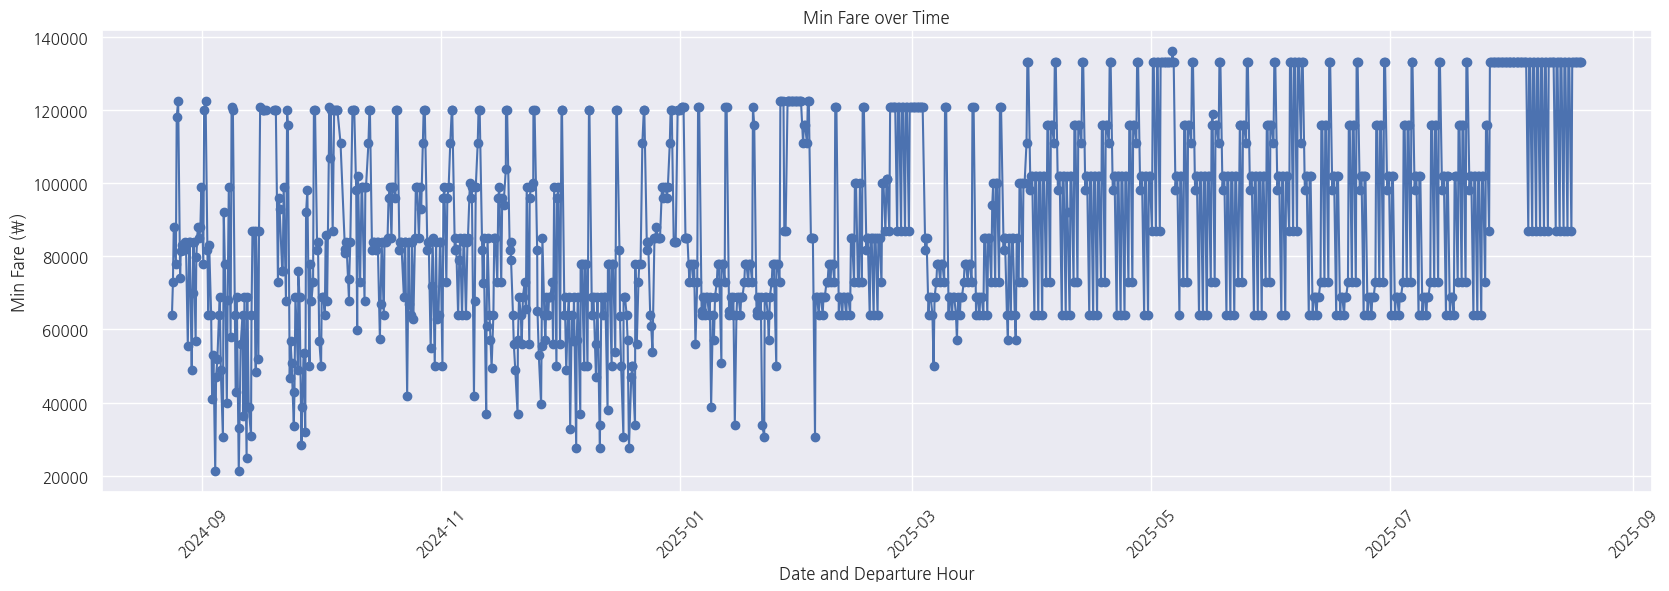

In [26]:
# 연도, 월, 일, 출발 시간을 조합하여 시간 순서로 표시 (새로운 열 추가하지 않음)
dates = pd.to_datetime( train_sample_min_fare[train_sample_min_fare['route']=='제주->김포'][['year', 'month', 'day']]) + pd.to_timedelta( train_sample_min_fare[train_sample_min_fare['route']=='제주->김포']['dep_hour'], unit='h')

# 시각화
plt.figure(figsize=(20, 6))
plt.plot(dates, train_sample_min_fare[train_sample_min_fare['route']=='제주->김포']['min_fare'], marker='o')
plt.title('Min Fare over Time')
plt.xlabel('Date and Departure Hour')
plt.ylabel('Min Fare (₩)')
plt.xticks(rotation=45)  # 가로축 레이블 회전
plt.grid(True)
plt.show()

In [27]:
train_sample_min_fare2 = train_sample_min_fare[['route','year','month', 'day','weekday', 'flight_duration', 'airline', 'min_fare', 'time_label']]
train_sample_min_fare2
train_sample_min_fare2 = train_sample_min_fare2.reset_index(drop=True)

In [28]:
train_sample_min_fare2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   route            14941 non-null  object 
 1   year             14941 non-null  int32  
 2   month            14941 non-null  int32  
 3   day              14941 non-null  int32  
 4   weekday          14941 non-null  object 
 5   flight_duration  14941 non-null  float64
 6   airline          14941 non-null  object 
 7   min_fare         14941 non-null  int64  
 8   time_label       14941 non-null  object 
dtypes: float64(1), int32(3), int64(1), object(4)
memory usage: 875.6+ KB


In [29]:
# 범주형 변수 식별 (필요에 따라 수동으로 지정 가능)
categorical_features = train_sample_min_fare2.select_dtypes(include=['object']).columns

# 원핫인코딩 수행
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(train_sample_min_fare2[categorical_features]))

# 인코딩된 컬럼 이름 설정
encoded_features.columns = encoder.get_feature_names_out(categorical_features)

# 기존 데이터프레임에서 범주형 변수 제거 후, 인코딩된 변수 추가
train_sample_min_fare2 = train_sample_min_fare2.drop(categorical_features, axis=1)
train_sample_min_fare2 = pd.concat([train_sample_min_fare2, encoded_features], axis=1)

# 인코딩 결과 확인
print(train_sample_min_fare2.head())


   year  month  day  flight_duration  min_fare  route_군산->제주  route_김포->제주  \
0  2024      8   18             50.0     74000           0.0           0.0   
1  2024      8   18             55.0     64000           0.0           0.0   
2  2024      8   18             55.0     84000           0.0           0.0   
3  2024      8   19             55.0     85900           0.0           0.0   
4  2024      8   19             55.0     64000           0.0           0.0   

   route_대구->제주  route_무안->제주  route_부산->제주  ...  airline_아시아나항공  \
0           0.0           0.0           0.0  ...             1.0   
1           0.0           0.0           0.0  ...             0.0   
2           0.0           0.0           0.0  ...             0.0   
3           0.0           0.0           0.0  ...             0.0   
4           0.0           0.0           0.0  ...             0.0   

   airline_에어로케이  airline_에어부산  airline_에어서울  airline_이스타항공  airline_제주항공  \
0            0.0           0.0           0.0 

In [30]:
train_sample_min_fare2

year  month  day  flight_duration  min_fare  route_군산->제주  \
0      2024      8   18             50.0     74000           0.0   
1      2024      8   18             55.0     64000           0.0   
2      2024      8   18             55.0     84000           0.0   
3      2024      8   19             55.0     85900           0.0   
4      2024      8   19             55.0     64000           0.0   
...     ...    ...  ...              ...       ...           ...   
14936  2025      3   27             65.0     82000           0.0   
14937  2025      3   28             65.0    104000           0.0   
14938  2025      3   28             65.0    104000           0.0   
14939  2025      3   29             65.0    104000           0.0   
14940  2025      3   29             65.0    104000           0.0   

       route_김포->제주  route_대구->제주  route_무안->제주  route_부산->제주  ...  \
0               0.0           0.0           0.0           0.0  ...   
1               0.0           0.0           0.0           0.0  ...   
2               0.0           0.0           0.0           0.0  ...   
3               0.0           0.0           0.0           0.0  ...   
4               0.0           0.0           0.0           0.0  ...   
...             ...           ...           ...           ...  ...   
14936           0.0           0.0           0.0           0.0  ...   
14937           0.0           0.0           0.0           0.0  ...   
14938           0.0           0.0           0.0           0.0  ...   
14939           0.0           0.0           0.0           0.0  ...   
14940           0.0           0.0           0.0           0.0  ...   

       airline_아시아나항공  airline_에어로케이  airline_에어부산  airline_에어서울  \
0                 1.0            0.0           0.0           0.0   
1                 0.0            0.0           0.0           0.0   
2                 0.0            0.0           0.0           0.0   
3                 0.0            0.0           0.0           0.0   
4                 0.0            0.0           0.0           0.0   
...               ...            ...           ...           ...   
14936             0.0            0.0           0.0           0.0   
14937             0.0            0.0           0.0           0.0   
14938             0.0            0.0           0.0           0.0   
14939             0.0            0.0           0.0           0.0   
14940             0.0            0.0           0.0           0.0   

       airline_이스타항공  airline_제주항공  airline_진에어  airline_티웨이항공  time_label_오후  \
0                0.0           0.0          0.0            0.0            0.0   
1                0.0           0.0          0.0            0.0            1.0   
2                0.0           0.0          0.0            0.0            0.0   
3                0.0           0.0          0.0            1.0            0.0   
4                0.0           0.0          0.0            0.0            1.0   
...              ...           ...          ...            ...            ...   
14936            0.0           0.0          1.0            0.0            1.0   
14937            0.0           0.0          1.0            0.0            0.0   
14938            0.0           0.0          1.0            0.0            1.0   
14939            0.0           0.0          1.0            0.0            0.0   
14940            0.0           0.0          1.0            0.0            1.0   

       time_label_저녁  
0                0.0  
1                0.0  
2                1.0  
3                0.0  
4                0.0  
...              ...  
14936            0.0  
14937            0.0  
14938            0.0  
14939            0.0  
14940            0.0  

[14941 rows x 44 columns]

In [31]:
# 특성 (X)과 타겟 변수 (y) 분리
X = train_sample_min_fare2.drop('min_fare', axis=1)
y = train_sample_min_fare2['min_fare']

In [32]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# 랜덤포레스트 회귀 모델 초기화 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [34]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 93046129.05654065
R^2 Score: 0.7838836149869102


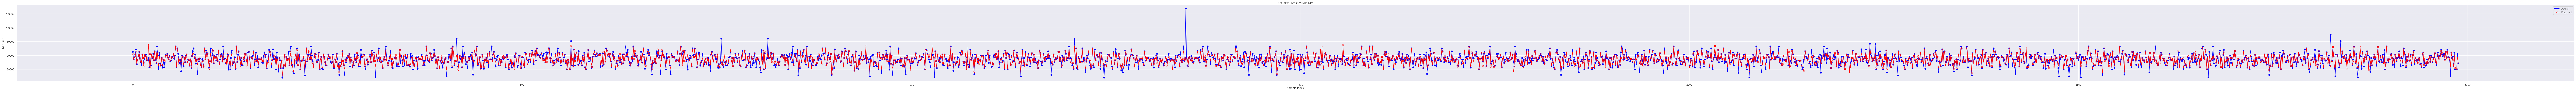

In [35]:
# 예측 결과 시각화
plt.figure(figsize=(200, 6))

# 실제 값
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')

# 예측 값
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted', color='red', marker='x')

plt.title('Actual vs Predicted Min Fare')
plt.xlabel('Sample Index')
plt.ylabel('Min Fare')
plt.legend()

plt.show()

##비행사 칼럼 제거

In [36]:
train_sample_min_fare3 = train_sample_min_fare[['route','year','month', 'day','weekday', 'flight_duration', 'min_fare', 'time_label']]
train_sample_min_fare3 = train_sample_min_fare3.reset_index(drop=True)

In [37]:
train_sample_min_fare3

route  year  month  day   weekday  flight_duration  min_fare  \
0      광주->제주  2024      8   18    Sunday             50.0     74000   
1      광주->제주  2024      8   18    Sunday             55.0     64000   
2      광주->제주  2024      8   18    Sunday             55.0     84000   
3      광주->제주  2024      8   19    Monday             55.0     85900   
4      광주->제주  2024      8   19    Monday             55.0     64000   
...       ...   ...    ...  ...       ...              ...       ...   
14936  포항->제주  2025      3   27  Thursday             65.0     82000   
14937  포항->제주  2025      3   28    Friday             65.0    104000   
14938  포항->제주  2025      3   28    Friday             65.0    104000   
14939  포항->제주  2025      3   29  Saturday             65.0    104000   
14940  포항->제주  2025      3   29  Saturday             65.0    104000   

      time_label  
0             오전  
1             오후  
2             저녁  
3             오전  
4             오후  
...          ...  
14936         오후  
14937         오전  
14938         오후  
14939         오전  
14940         오후  

[14941 rows x 8 columns]

In [38]:
# 범주형 변수 식별 (필요에 따라 수동으로 지정 가능)
categorical_features = train_sample_min_fare3.select_dtypes(include=['object']).columns

# 원핫인코딩 수행
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(train_sample_min_fare3[categorical_features]))

# 인코딩된 컬럼 이름 설정
encoded_features.columns = encoder.get_feature_names_out(categorical_features)

# 기존 데이터프레임에서 범주형 변수 제거 후, 인코딩된 변수 추가
train_sample_min_fare3 = train_sample_min_fare3.drop(categorical_features, axis=1)
train_sample_min_fare3 = pd.concat([train_sample_min_fare3, encoded_features], axis=1)

# 인코딩 결과 확인
print(train_sample_min_fare3.head())


   year  month  day  flight_duration  min_fare  route_군산->제주  route_김포->제주  \
0  2024      8   18             50.0     74000           0.0           0.0   
1  2024      8   18             55.0     64000           0.0           0.0   
2  2024      8   18             55.0     84000           0.0           0.0   
3  2024      8   19             55.0     85900           0.0           0.0   
4  2024      8   19             55.0     64000           0.0           0.0   

   route_대구->제주  route_무안->제주  route_부산->제주  ...  route_청주->제주  route_포항->제주  \
0           0.0           0.0           0.0  ...           0.0           0.0   
1           0.0           0.0           0.0  ...           0.0           0.0   
2           0.0           0.0           0.0  ...           0.0           0.0   
3           0.0           0.0           0.0  ...           0.0           0.0   
4           0.0           0.0           0.0  ...           0.0           0.0   

   weekday_Monday  weekday_Saturday  weekday_Sunda

In [39]:
# 특성 (X)과 타겟 변수 (y) 분리
X = train_sample_min_fare3.drop('min_fare', axis=1)
y = train_sample_min_fare3['min_fare']

In [40]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# 랜덤포레스트 회귀 모델 초기화 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [42]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 109023334.94379391
R^2 Score: 0.7467736780773928


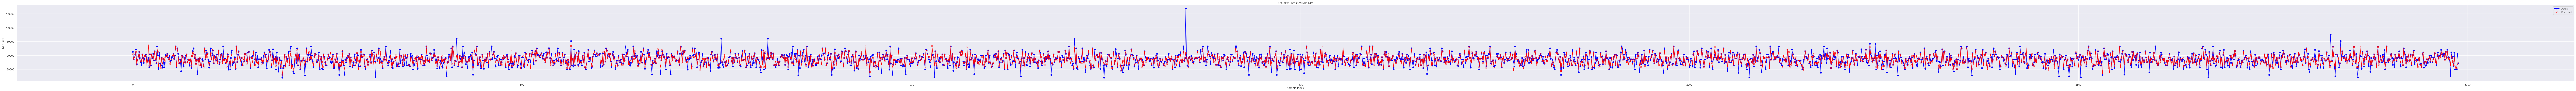

In [43]:
# 예측 결과 시각화
plt.figure(figsize=(200, 6))

# 실제 값
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')

# 예측 값
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted', color='red', marker='x')

plt.title('Actual vs Predicted Min Fare')
plt.xlabel('Sample Index')
plt.ylabel('Min Fare')
plt.legend()

plt.show()

##2024/09~2024/12 데이터만 사용

In [44]:
#train_sample_min_fare4 = train_sample_min_fare3[~((train_sample_min_fare3['year'] >= 2025) & (train_sample_min_fare3['month'] >= 1))] #비행사 없는 버전
train_sample_min_fare4 = train_sample_min_fare2[((train_sample_min_fare2['year'] == 2024) & (train_sample_min_fare2['month'] >= 9))] #비행사 있는 버전 (5% 가량 더 높은 예측률)
train_sample_min_fare5 = train_sample_min_fare4.drop(columns=['flight_duration']).reset_index(drop=True)
train_sample_min_fare5

year  month  day  min_fare  route_군산->제주  route_김포->제주  route_대구->제주  \
0     2024      9    1     77900           0.0           0.0           0.0   
1     2024      9    1     41700           0.0           0.0           0.0   
2     2024      9    1     73000           0.0           0.0           0.0   
3     2024      9    2     65900           0.0           0.0           0.0   
4     2024      9    2     50000           0.0           0.0           0.0   
...    ...    ...  ...       ...           ...           ...           ...   
5748  2024     12   29     94000           0.0           0.0           0.0   
5749  2024     12   30    104000           0.0           0.0           0.0   
5750  2024     12   30    104000           0.0           0.0           0.0   
5751  2024     12   31    104000           0.0           0.0           0.0   
5752  2024     12   31    104000           0.0           0.0           0.0   

      route_무안->제주  route_부산->제주  route_사천->제주  ...  airline_아시아나항공  \
0              0.0           0.0           0.0  ...             0.0   
1              0.0           0.0           0.0  ...             1.0   
2              0.0           0.0           0.0  ...             0.0   
3              0.0           0.0           0.0  ...             0.0   
4              0.0           0.0           0.0  ...             0.0   
...            ...           ...           ...  ...             ...   
5748           0.0           0.0           0.0  ...             0.0   
5749           0.0           0.0           0.0  ...             0.0   
5750           0.0           0.0           0.0  ...             0.0   
5751           0.0           0.0           0.0  ...             0.0   
5752           0.0           0.0           0.0  ...             0.0   

      airline_에어로케이  airline_에어부산  airline_에어서울  airline_이스타항공  airline_제주항공  \
0               0.0           0.0           0.0            0.0           0.0   
1               0.0           0.0           0.0            0.0           0.0   
2               0.0           0.0           0.0            0.0           0.0   
3               0.0           0.0           0.0            0.0           0.0   
4               0.0           0.0           0.0            0.0           0.0   
...             ...           ...           ...            ...           ...   
5748            0.0           0.0           0.0            0.0           0.0   
5749            0.0           0.0           0.0            0.0           0.0   
5750            0.0           0.0           0.0            0.0           0.0   
5751            0.0           0.0           0.0            0.0           0.0   
5752            0.0           0.0           0.0            0.0           0.0   

      airline_진에어  airline_티웨이항공  time_label_오후  time_label_저녁  
0             0.0            1.0            0.0            0.0  
1             0.0            0.0            1.0            0.0  
2             0.0            0.0            0.0            1.0  
3             0.0            1.0            0.0            0.0  
4             0.0            0.0            1.0            0.0  
...           ...            ...            ...            ...  
5748          1.0            0.0            1.0            0.0  
5749          1.0            0.0            0.0            0.0  
5750          1.0            0.0            1.0            0.0  
5751          1.0            0.0            0.0            0.0  
5752          1.0            0.0            1.0            0.0  

[5753 rows x 43 columns]

In [45]:
train_sample_min_fare5.columns

Index(['year', 'month', 'day', 'min_fare', 'route_군산->제주', 'route_김포->제주',
       'route_대구->제주', 'route_무안->제주', 'route_부산->제주', 'route_사천->제주',
       'route_여수->제주', 'route_울산->제주', 'route_원주->제주', 'route_제주->광주',
       'route_제주->군산', 'route_제주->김포', 'route_제주->대구', 'route_제주->무안',
       'route_제주->부산', 'route_제주->사천', 'route_제주->여수', 'route_제주->울산',
       'route_제주->원주', 'route_제주->청주', 'route_제주->포항', 'route_청주->제주',
       'route_포항->제주', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'airline_아시아나항공', 'airline_에어로케이', 'airline_에어부산', 'airline_에어서울',
       'airline_이스타항공', 'airline_제주항공', 'airline_진에어', 'airline_티웨이항공',
       'time_label_오후', 'time_label_저녁'],
      dtype='object')

In [46]:
# 특성 (X)과 타겟 변수 (y) 분리
X = train_sample_min_fare5.drop('min_fare', axis=1)
y = train_sample_min_fare5['min_fare']

In [47]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# 랜덤포레스트 회귀 모델 초기화 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [49]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 159732920.42550826
R^2 Score: 0.6580255104244388


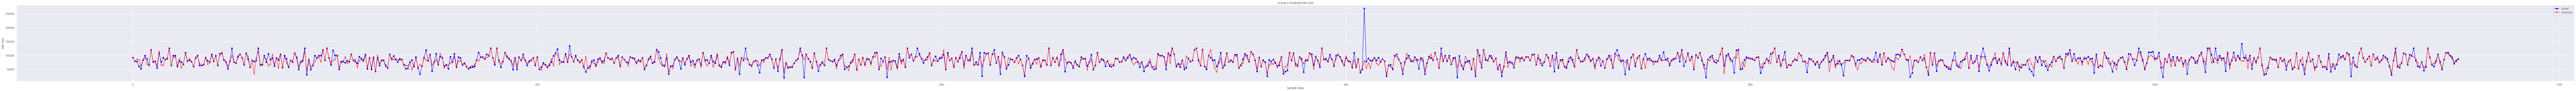

In [50]:
# 예측 결과 시각화
plt.figure(figsize=(200, 6))

# 실제 값
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')

# 예측 값
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted', color='red', marker='x')

plt.title('Actual vs Predicted Min Fare')
plt.xlabel('Sample Index')
plt.ylabel('Min Fare')
plt.legend()

plt.show()

#파이캐럿으로 예측률 최적화

##최적의 회귀 모델 선정하기

In [51]:
pip install pycaret

In [52]:
from pycaret.regression import *

In [91]:
# IQR 방법을 사용한 이상치 제거 함수
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치를 제외한 데이터프레임 반환
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# train_sample_min_fare5 데이터프레임의 min_fare 열에서 이상치 제거
train_sample_min_fare5 = remove_outliers_iqr(train_sample_min_fare5, 'min_fare')

In [92]:
exp = setup(train_sample_min_fare5, target='min_fare')

In [93]:
compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=7227)

In [94]:
lgbm = create_model('lightgbm')
xgb = create_model('xgboost')
blended_model = blend_models(estimator_list=[lgbm, xgb])

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

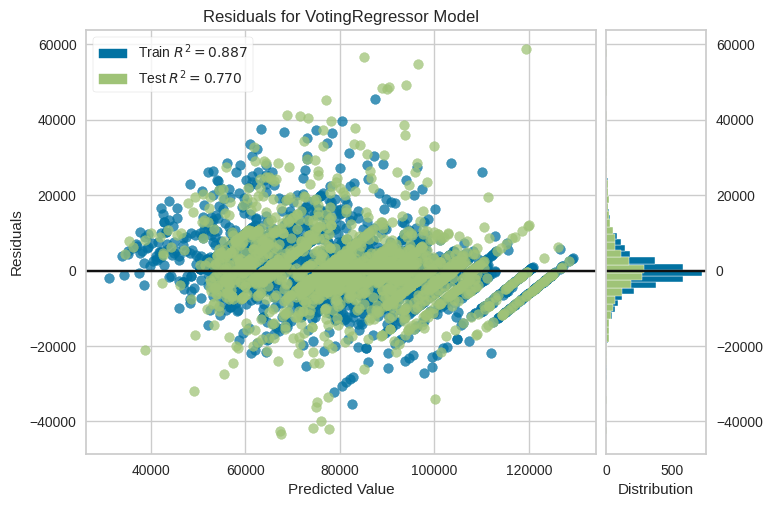

In [95]:
plot_model(blended_model)

In [130]:
save_model(blended_model, '/content/drive/MyDrive/2024 YBIGTA 여행루트추천(컨퍼)/항공권_가격_예측/flight_fare_predict')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['year', 'month', 'day',
                                              'route_군산->제주', 'route_김포->제주',
                                              'route_대구->제주', 'route_무안->제주',
                                              'route_부산->제주', 'route_사천->제주',
                                              'route_여수->제주', 'route_울산->제주',
                                              'route_원주->제주', 'route_제주->광주',
                                              'route_제주->군산', 'route_제주->김포',
                                              'route_제주->대구', 'route_제주->무안',
                                              'route_제주->부산', 'route_제주-...
                                                            grow_policy=None,
                                                            importance_type=None,
                                                            interacti

In [113]:
predict_model(blended_model).head(50)

year  month  day  route_군산->제주  route_김포->제주  route_대구->제주  \
1673  2024     12   18           0.0           0.0           0.0   
2673  2024     10    6           0.0           0.0           0.0   
5290  2024     10   16           0.0           0.0           0.0   
4357  2024      9    9           0.0           0.0           0.0   
3955  2024      9   11           0.0           0.0           0.0   
2704  2024     10   22           0.0           0.0           0.0   
2713  2024     10   28           0.0           0.0           0.0   
2458  2024     11   11           0.0           0.0           0.0   
730   2024     11   11           0.0           1.0           0.0   
1788  2024     10   29           0.0           0.0           0.0   
3978  2024      9   24           0.0           0.0           0.0   
5712  2024     12   11           0.0           0.0           0.0   
3889  2024      9    6           0.0           0.0           0.0   
5546  2024      9   18           0.0           0.0           0.0   
3545  2024      9    3           0.0           0.0           0.0   
2625  2024      9    8           0.0           0.0           0.0   
4589  2024      9    8           0.0           0.0           0.0   
2333  2024      9   26           0.0           0.0           0.0   
1440  2024     10   29           0.0           0.0           0.0   
5340  2024     11    2           0.0           0.0           0.0   
5443  2024     12    7           0.0           0.0           0.0   
3083  2024     12   14           0.0           0.0           0.0   
4038  2024     10   25           0.0           0.0           0.0   
2140  2024     10   30           0.0           0.0           0.0   
3332  2024     11    7           0.0           0.0           0.0   
3373  2024     11   20           0.0           0.0           0.0   
4544  2024     12   20           0.0           0.0           0.0   
2521  2024     12    2           0.0           0.0           0.0   
4322  2024     12   12           0.0           0.0           0.0   
4483  2024     11   20           0.0           0.0           0.0   
4537  2024     12   17           0.0           0.0           0.0   
1223  2024     12   25           0.0           0.0           1.0   
602   2024      9   28           0.0           1.0           0.0   
4674  2024     10    9           0.0           0.0           0.0   
1610  2024     12   25           0.0           0.0           0.0   
2855  2024      9   28           0.0           0.0           0.0   
3940  2024      9    3           0.0           0.0           0.0   
1325  2024      9   19           0.0           0.0           0.0   
3674  2024     10   21           0.0           0.0           0.0   
772   2024     11   25           0.0           1.0           0.0   
2221  2024     12   10           0.0           0.0           0.0   
4409  2024     10   10           0.0           0.0           0.0   
2626  2024      9    9           0.0           0.0           0.0   
4923  2024     12   31           0.0           0.0           0.0   
3188  2024      9   19           0.0           0.0           0.0   
5433  2024     12    3           0.0           0.0           0.0   
5512  2024     12   30           0.0           0.0           0.0   
3447  2024     12   15           0.0           0.0           0.0   
843   2024     12   18           0.0           1.0           0.0   
405   2024      9   30           1.0           0.0           0.0   

      route_무안->제주  route_부산->제주  route_사천->제주  route_여수->제주  ...  \
1673           0.0           0.0           1.0           0.0  ...   
2673           0.0           0.0           0.0           0.0  ...   
5290           0.0           0.0           0.0           0.0  ...   
4357           0.0           0.0           0.0           0.0  ...   
3955           0.0           0.0           0.0           0.0  ...   
2704           0.0           0.0           0.0           0.0  ...   
2713           0.0           0.0           0.0        

##학습된 모델로 항공권 예측

In [98]:
train_sample_min_fare5.columns

Index(['year', 'month', 'day', 'min_fare', 'route_군산->제주', 'route_김포->제주',
       'route_대구->제주', 'route_무안->제주', 'route_부산->제주', 'route_사천->제주',
       'route_여수->제주', 'route_울산->제주', 'route_원주->제주', 'route_제주->광주',
       'route_제주->군산', 'route_제주->김포', 'route_제주->대구', 'route_제주->무안',
       'route_제주->부산', 'route_제주->사천', 'route_제주->여수', 'route_제주->울산',
       'route_제주->원주', 'route_제주->청주', 'route_제주->포항', 'route_청주->제주',
       'route_포항->제주', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'airline_아시아나항공', 'airline_에어로케이', 'airline_에어부산', 'airline_에어서울',
       'airline_이스타항공', 'airline_제주항공', 'airline_진에어', 'airline_티웨이항공',
       'time_label_오후', 'time_label_저녁'],
      dtype='object')

In [62]:
# import pandas as pd
# from datetime import datetime, timedelta

# # 기존 데이터 프레임 생성 예시 (빈 데이터 프레임으로 시작)
# columns = ['route_군산->제주', 'route_김포->제주', 'route_대구->제주', 'route_무안->제주', 'route_부산->제주',
#            'route_사천->제주', 'route_여수->제주', 'route_울산->제주', 'route_원주->제주', 'route_제주->광주',
#            'route_제주->군산', 'route_제주->김포', 'route_제주->대구', 'route_제주->무안', 'route_제주->부산',
#            'route_제주->사천', 'route_제주->여수', 'route_제주->울산', 'route_제주->원주', 'route_제주->청주',
#            'route_제주->포항', 'route_청주->제주', 'route_포항->제주', 'weekday_Monday', 'weekday_Saturday',
#            'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'airline_아시아나항공',
#            'airline_에어로케이', 'airline_에어부산', 'airline_에어서울', 'airline_이스타항공', 'airline_제주항공',
#            'airline_진에어', 'airline_티웨이항공', 'time_label_오후', 'time_label_저녁', 'datetime', 'year', 'month', 'day', 'route_dummy', 'airline_dummy']

# df = pd.DataFrame(columns=columns)

# # 2025년의 시작일과 종료일
# start_date = datetime(2024, 9, 1)
# end_date = datetime(2025, 12, 31)

# # 날짜별로 3개의 시간 생성 및 데이터 프레임에 추가
# date_list = pd.date_range(start=start_date, end=end_date)

# new_rows = []

# # 요일 이름 매핑 (Python의 요일은 0: Monday, 6: Sunday)
# weekday_columns = {
#     0: 'weekday_Monday',
#     1: 'weekday_Tuesday',
#     2: 'weekday_Wednesday',
#     3: 'weekday_Thursday',
#     4: 'weekday_Friday',  # 금요일도 고려
#     5: 'weekday_Saturday',
#     6: 'weekday_Sunday'
# }

# # 각 날짜마다 3개의 다른 시간을 생성하여 추가
# for date in date_list:
#     for hour in [9, 15, 20]:  # 9시, 15시, 20시로 설정
#         dt = date + timedelta(hours=hour)
#         new_row = {col: 0 for col in columns}  # 기본 값으로 0을 설정
#         new_row['datetime'] = dt
#         new_row['year'] = dt.year
#         new_row['month'] = dt.month
#         new_row['day'] = dt.day
#         new_row['time_label_오후'] = 1 if hour == 15 else 0
#         new_row['time_label_저녁'] = 1 if hour == 20 else 0

#         # 요일에 맞는 weekday 열에 1 설정
#         weekday = dt.weekday()  # 요일 가져오기 (0: Monday, ..., 6: Sunday)
#         weekday_col = weekday_columns.get(weekday)
#         if weekday_col:
#             new_row[weekday_col] = 1

#         new_rows.append(new_row)

# # 새로운 데이터 프레임 생성
# df_new = pd.DataFrame(new_rows, columns=columns)

# # 기존 데이터 프레임에 추가
# df = pd.concat([df, df_new], ignore_index=True)

# df.columns

Index(['route_군산->제주', 'route_김포->제주', 'route_대구->제주', 'route_무안->제주',
       'route_부산->제주', 'route_사천->제주', 'route_여수->제주', 'route_울산->제주',
       'route_원주->제주', 'route_제주->광주', 'route_제주->군산', 'route_제주->김포',
       'route_제주->대구', 'route_제주->무안', 'route_제주->부산', 'route_제주->사천',
       'route_제주->여수', 'route_제주->울산', 'route_제주->원주', 'route_제주->청주',
       'route_제주->포항', 'route_청주->제주', 'route_포항->제주', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'airline_아시아나항공',
       'airline_에어로케이', 'airline_에어부산', 'airline_에어서울', 'airline_이스타항공',
       'airline_제주항공', 'airline_진에어', 'airline_티웨이항공', 'time_label_오후',
       'time_label_저녁', 'datetime', 'year', 'month', 'day', 'route_dummy',
       'airline_dummy'],
      dtype='object')

In [63]:
# import pandas as pd

# # 기존 데이터 프레임에서 route 관련 열과 airline 관련 열을 추출
# route_columns = [col for col in df.columns if col.startswith('route_')]
# airline_columns = [col for col in df.columns if col.startswith('airline_')]

# # 새로운 데이터프레임을 저장할 리스트
# new_rows = []

# # 각 행에 대해 route와 airline의 모든 조합을 만듦
# for _, row in df.iterrows():
#     for route_col in route_columns:
#         for airline_col in airline_columns:
#             # 새로운 행을 생성
#             new_row = row.copy()

#             # 모든 route, airline 값을 0으로 설정
#             new_row[route_columns] = 0
#             new_row[airline_columns] = 0

#             # 선택된 route, airline에 대해 1로 설정
#             new_row[route_col] = 1
#             new_row[airline_col] = 1

#             # 새 행을 new_rows 리스트에 추가
#             new_rows.append(new_row)

# # 새로운 데이터프레임 생성
# df_expanded = pd.DataFrame(new_rows)

# df_expanded.to_csv('test_flight.csv', index=False)

In [99]:
test_df = df_expanded[['year', 'month', 'day', 'route_군산->제주', 'route_김포->제주',
       'route_대구->제주', 'route_무안->제주', 'route_부산->제주', 'route_사천->제주',
       'route_여수->제주', 'route_울산->제주', 'route_원주->제주', 'route_제주->광주',
       'route_제주->군산', 'route_제주->김포', 'route_제주->대구', 'route_제주->무안',
       'route_제주->부산', 'route_제주->사천', 'route_제주->여수', 'route_제주->울산',
       'route_제주->원주', 'route_제주->청주', 'route_제주->포항', 'route_청주->제주',
       'route_포항->제주', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'airline_아시아나항공', 'airline_에어로케이', 'airline_에어부산', 'airline_에어서울',
       'airline_이스타항공', 'airline_제주항공', 'airline_진에어', 'airline_티웨이항공',
       'time_label_오후', 'time_label_저녁']]

In [100]:
from_seoul.route.unique()

array(['광주->제주', '군산->제주', '대구->제주', '무안->제주', '부산->제주', '사천->제주',
       '김포->제주', '여수->제주', '울산->제주', '원주->제주', '청주->제주', '포항->제주',
       '제주->청주', '제주->여수', '제주->김포', '제주->부산', '제주->대구', '제주->광주',
       '제주->울산', '제주->군산', '제주->무안', '제주->사천', '제주->원주', '제주->포항'],
      dtype=object)

In [101]:
test_df = test_df.reset_index(drop=True)

In [102]:
test_pred = predict_model(blended_model, data = test_df)

In [104]:
test_pred

year  month  day  route_군산->제주  route_김포->제주  route_대구->제주  \
0       2024      9    1             1             0             0   
1       2024      9    1             1             0             0   
2       2024      9    1             1             0             0   
3       2024      9    1             1             0             0   
4       2024      9    1             1             0             0   
...      ...    ...  ...           ...           ...           ...   
315571  2025     12   31             0             0             0   
315572  2025     12   31             0             0             0   
315573  2025     12   31             0             0             0   
315574  2025     12   31             0             0             0   
315575  2025     12   31             0             0             0   

        route_무안->제주  route_부산->제주  route_사천->제주  route_여수->제주  ...  \
0                  0             0             0             0  ...   
1                  0             0             0             0  ...   
2                  0             0             0             0  ...   
3                  0             0             0             0  ...   
4                  0             0             0             0  ...   
...              ...           ...           ...           ...  ...   
315571             0             0             0             0  ...   
315572             0             0             0             0  ...   
315573             0             0             0             0  ...   
315574             0             0             0             0  ...   
315575             0             0             0             0  ...   

        airline_에어로케이  airline_에어부산  airline_에어서울  airline_이스타항공  \
0                   0             0             0              0   
1                   1             0             0              0   
2                   0             1             0              0   
3                   0             0             1              0   
4                   0             0             0              1   
...               ...           ...           ...            ...   
315571              0             0             0              1   
315572              0             0             0              0   
315573              0             0             0              0   
315574              0             0             0              0   
315575              0             0             0              0   

        airline_제주항공  airline_진에어  airline_티웨이항공  time_label_오후  \
0                  0            0              0              0   
1                  0            0              0              0   
2                  0            0              0              0   
3                  0            0              0              0   
4                  0            0              0              0   
...              ...          ...            ...            ...   
315571             0            0              0              0   
315572             1            0              0              0   
315573             0            1              0              0   
315574             0            0              1              0   
315575             0            0              0              0   

        time_label_저녁  prediction_label  
0                   0      74254.521325  
1                   0      88208.622840  
2                   0      83544.499189  
3                   0      80176.540006  
4                   0      70174.078638  
...               ...               ...  
315571              1      92114.426368  
315572              1      75452.299747  
315573              1      89998.103443  
315574              1      93372.360182  
315575              1      75604.678196  

[315576 rows x 43 columns]

In [105]:
# 원핫인코딩된 데이터 프레임이 있다고 가정합니다.
# route_와 airline_으로 시작하는 열을 추출합니다.
route_cols = [col for col in test_pred.columns if col.startswith('route_')]
airline_cols = [col for col in test_pred.columns if col.startswith('airline_')]
weekday_cols = [col for col in test_pred.columns if col.startswith('weekday_')]
time_label_cols = [col for col in test_pred.columns if col.startswith('time_label_')]

# 'route'와 'airline' 열을 추가합니다.
test_pred['route'] = '-'
test_pred['airline'] = '-'
test_pred['weekday'] = '-'
test_pred['time_label'] = '-'

# 각 행에 대해 원핫인코딩된 값에서 원래 값을 복원합니다.
for idx, row in test_pred.iterrows():
    # 'route_~' 열에서 1인 값 찾기
    route_found = False
    for route_col in route_cols:
        if row[route_col] == 1:
            test_pred.at[idx, 'route'] = route_col.replace('route_', '')
            route_found = True
            break  # 첫 번째로 1이 발견된 route만 반영

    # 'airline_~' 열에서 1인 값 찾기
    airline_found = False
    for airline_col in airline_cols:
        if row[airline_col] == 1:
            test_pred.at[idx, 'airline'] = airline_col.replace('airline_', '')
            airline_found = True
            break  # 첫 번째로 1이 발견된 airline만 반영

    # 'weekday~' 열에서 1인 값 찾기
    weekdayfound = False
    for weekdaycol in weekday_cols:
        if row[weekdaycol] == 1:
            test_pred.at[idx, 'weekday'] = weekdaycol.replace('weekday_', '')
            weekdayfound = True
            break  # 첫 번째로 1이 발견된 weekday만

    # 'time_label_~' 열에서 1인 값 찾기
    time_label_found = False
    for time_label_col in time_label_cols:
        if row[time_label_col] == 1:
            test_pred.at[idx, 'time_label'] = time_label_col.replace('time_label_', '')
            time_label_found = True
            break  # 첫 번째로 1이 발견된 time_label만 반영

    # 만약 route 또는 airline이 1이 없으면 '-'로 유지됨
    if not route_found:
        test_pred.at[idx, 'route'] = '-'
    if not airline_found:
        test_pred.at[idx, 'airline'] = '-'
    if not weekdayfound:
        test_pred.at[idx, 'weekday'] = '-'
    if not time_label_found:
        test_pred.at[idx, 'time_label'] = '-'

In [106]:
test_pred

year  month  day  route_군산->제주  route_김포->제주  route_대구->제주  \
0       2024      9    1             1             0             0   
1       2024      9    1             1             0             0   
2       2024      9    1             1             0             0   
3       2024      9    1             1             0             0   
4       2024      9    1             1             0             0   
...      ...    ...  ...           ...           ...           ...   
315571  2025     12   31             0             0             0   
315572  2025     12   31             0             0             0   
315573  2025     12   31             0             0             0   
315574  2025     12   31             0             0             0   
315575  2025     12   31             0             0             0   

        route_무안->제주  route_부산->제주  route_사천->제주  route_여수->제주  ...  \
0                  0             0             0             0  ...   
1                  0             0             0             0  ...   
2                  0             0             0             0  ...   
3                  0             0             0             0  ...   
4                  0             0             0             0  ...   
...              ...           ...           ...           ...  ...   
315571             0             0             0             0  ...   
315572             0             0             0             0  ...   
315573             0             0             0             0  ...   
315574             0             0             0             0  ...   
315575             0             0             0             0  ...   

        airline_제주항공  airline_진에어  airline_티웨이항공  time_label_오후  \
0                  0            0              0              0   
1                  0            0              0              0   
2                  0            0              0              0   
3                  0            0              0              0   
4                  0            0              0              0   
...              ...          ...            ...            ...   
315571             0            0              0              0   
315572             1            0              0              0   
315573             0            1              0              0   
315574             0            0              1              0   
315575             0            0              0              0   

        time_label_저녁  prediction_label   route  airline    weekday  \
0                   0      74254.521325  군산->제주   아시아나항공     Sunday   
1                   0      88208.622840  군산->제주    에어로케이     Sunday   
2                   0      83544.499189  군산->제주     에어부산     Sunday   
3                   0      80176.540006  군산->제주     에어서울     Sunday   
4                   0      70174.078638  군산->제주    이스타항공     Sunday   
...               ...               ...     ...      ...        ...   
315571              1      92114.426368       -    이스타항공  Wednesday   
315572              1      75452.299747       -     제주항공  Wednesday   
315573              1      89998.103443       -      진에어  Wednesday   
315574              1      93372.360182       -    티웨이항공  Wednesday   
315575              1      75604.678196       -        -  Wednesday   

        time_label  
0                -  
1                -  
2                -  
3                -  
4                -  
...            ...  
315571          저녁  
315572          저녁  
315573          저녁  
315574          저녁  
315575          저녁  

[315576 rows x 47 columns]

In [107]:
# route 열이 '-'인 경우 '광주->제주'로 변경
test_pred['route'] = test_pred['route'].replace('-', '광주->제주')

# airline 열이 '-'인 경우 '대한항공'으로 변경
test_pred['airline'] = test_pred['airline'].replace('-', '대한항공')

# weekday 열이 '-'인 경우 '대한항공'으로 변경
test_pred['weekday'] = test_pred['weekday'].replace('Monday', '월요일')
test_pred['weekday'] = test_pred['weekday'].replace('Tuesday', '화요일')
test_pred['weekday'] = test_pred['weekday'].replace('Wednesday', '수요일')
test_pred['weekday'] = test_pred['weekday'].replace('Thursday', '목요일')
test_pred['weekday'] = test_pred['weekday'].replace('-', '금요일')
test_pred['weekday'] = test_pred['weekday'].replace('Saturday', '토요일')
test_pred['weekday'] = test_pred['weekday'].replace('Sunday', '일요일')

# time_label 열이 '-'인 경우 '대한항공'으로 변경
test_pred['time_label'] = test_pred['time_label'].replace('-', '오전')

In [108]:
test_pred

year  month  day  route_군산->제주  route_김포->제주  route_대구->제주  \
0       2024      9    1             1             0             0   
1       2024      9    1             1             0             0   
2       2024      9    1             1             0             0   
3       2024      9    1             1             0             0   
4       2024      9    1             1             0             0   
...      ...    ...  ...           ...           ...           ...   
315571  2025     12   31             0             0             0   
315572  2025     12   31             0             0             0   
315573  2025     12   31             0             0             0   
315574  2025     12   31             0             0             0   
315575  2025     12   31             0             0             0   

        route_무안->제주  route_부산->제주  route_사천->제주  route_여수->제주  ...  \
0                  0             0             0             0  ...   
1                  0             0             0             0  ...   
2                  0             0             0             0  ...   
3                  0             0             0             0  ...   
4                  0             0             0             0  ...   
...              ...           ...           ...           ...  ...   
315571             0             0             0             0  ...   
315572             0             0             0             0  ...   
315573             0             0             0             0  ...   
315574             0             0             0             0  ...   
315575             0             0             0             0  ...   

        airline_제주항공  airline_진에어  airline_티웨이항공  time_label_오후  \
0                  0            0              0              0   
1                  0            0              0              0   
2                  0            0              0              0   
3                  0            0              0              0   
4                  0            0              0              0   
...              ...          ...            ...            ...   
315571             0            0              0              0   
315572             1            0              0              0   
315573             0            1              0              0   
315574             0            0              1              0   
315575             0            0              0              0   

        time_label_저녁  prediction_label   route  airline  weekday  time_label  
0                   0      74254.521325  군산->제주   아시아나항공      일요일          오전  
1                   0      88208.622840  군산->제주    에어로케이      일요일          오전  
2                   0      83544.499189  군산->제주     에어부산      일요일          오전  
3                   0      80176.540006  군산->제주     에어서울      일요일          오전  
4                   0      70174.078638  군산->제주    이스타항공      일요일          오전  
...               ...               ...     ...      ...      ...         ...  
315571              1      92114.426368  광주->제주    이스타항공      수요일          저녁  
315572              1      75452.299747  광주->제주     제주항공      수요일          저녁  
315573              1      89998.103443  광주->제주      진에어      수요일          저녁  
315574              1      93372.360182  광주->제주    티웨이항공      수요일          저녁  
315575              1      75604.678196  광주->제주     대한항공      수요일          저녁  

[315576 rows x 47 columns]

In [109]:
final_pred = test_pred[['year', 'month', 'day', 'weekday', 'time_label', 'route', 'airline', 'prediction_label']]

In [110]:
final_pred['prediction_label'] = final_pred['prediction_label'].round().astype(int)
final_pred = final_pred.rename(columns={'prediction_label': 'pred_fare'})
final_pred

year  month  day weekday time_label   route airline  pred_fare
0       2024      9    1     일요일         오전  군산->제주  아시아나항공      74255
1       2024      9    1     일요일         오전  군산->제주   에어로케이      88209
2       2024      9    1     일요일         오전  군산->제주    에어부산      83544
3       2024      9    1     일요일         오전  군산->제주    에어서울      80177
4       2024      9    1     일요일         오전  군산->제주   이스타항공      70174
...      ...    ...  ...     ...        ...     ...     ...        ...
315571  2025     12   31     수요일         저녁  광주->제주   이스타항공      92114
315572  2025     12   31     수요일         저녁  광주->제주    제주항공      75452
315573  2025     12   31     수요일         저녁  광주->제주     진에어      89998
315574  2025     12   31     수요일         저녁  광주->제주   티웨이항공      93372
315575  2025     12   31     수요일         저녁  광주->제주    대한항공      75605

[315576 rows x 8 columns]

In [111]:
final_pred.to_csv('test_flight_pred.csv', index=False)

In [132]:
# 데이터프레임에서 필요한 열이 'year', 'month', 'day', 'pred_fare' 이므로 이를 기준으로 그룹핑합니다.
# 날짜별로 'pred_fare'가 가장 낮은 행의 인덱스를 가져옵니다.
min_fare_idx = final_pred.groupby(['year', 'month', 'day', 'route'])['pred_fare'].idxmin()
min_fare_idx2 = final_pred.groupby(['year', 'month', 'day', 'route', 'time_label'])['pred_fare'].idxmin()

# 해당 인덱스에 해당하는 행만 추출합니다.
min_fare_final_pred = final_pred.loc[min_fare_idx]
min_fare_final_pred2 = final_pred.loc[min_fare_idx2]

In [134]:
# 결과 출력
min_fare_final_pred = min_fare_final_pred.reset_index(drop=True)
min_fare_final_pred2 = min_fare_final_pred2.reset_index(drop=True)

min_fare_final_pred.to_csv('/content/drive/MyDrive/2024 YBIGTA 여행루트추천(컨퍼)/항공권_가격_예측/flight_fare_predict_date_min.csv', index=False)
min_fare_final_pred2.to_csv('/content/drive/MyDrive/2024 YBIGTA 여행루트추천(컨퍼)/항공권_가격_예측/flight_fare_predict_time_min.csv', index=False)
min_fare_final_pred

year  month  day weekday time_label   route airline  pred_fare
0      2024      9    1     일요일         오전  광주->제주   이스타항공      66187
1      2024      9    1     일요일         오전  군산->제주   이스타항공      70174
2      2024      9    1     일요일         저녁  김포->제주    제주항공      46744
3      2024      9    1     일요일         오전  대구->제주   이스타항공      64026
4      2024      9    1     일요일         오전  무안->제주   이스타항공      72771
...     ...    ...  ...     ...        ...     ...     ...        ...
11683  2025     12   31     수요일         오전  제주->원주    제주항공      85064
11684  2025     12   31     수요일         오전  제주->청주    제주항공      70432
11685  2025     12   31     수요일         오전  제주->포항    제주항공      78621
11686  2025     12   31     수요일         오전  청주->제주    제주항공      62784
11687  2025     12   31     수요일         오전  포항->제주    제주항공      78371

[11688 rows x 8 columns]